## Importing Libraries

In [1]:
import pandas as pd
import numpy as np  

In [2]:
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler,OneHotEncoder
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report,accuracy_score,confusion_matrix
from sklearn import tree
import warnings 
warnings.filterwarnings('ignore')

## Reading Data

In [3]:
train_data=pd.read_csv('./Train_Data.csv')

In [4]:
train_data.sample(10)

,pc,ld,m0,m1,m2,m3,m4,m5,m6,m7,m8,m9,m10,m11,m12,m13,m14,ma,pred
20022,w,187.46,126.0,4.0,73.5,14.3808,115.2270,14.7448,193.0845,10.1456,197.8830,8.3688,178.4895,17.8488,130.1895,11.5848,160.8285,m78,1
19836,x,72.85,10.5,6.4,94.5,13.5616,134.6730,14.5808,201.0960,10.5952,188.1915,8.0120,148.7010,15.5688,126.0525,11.1032,164.6400,m55,0
22241,y,76.58,115.5,10.4,31.5,13.4992,109.5255,13.4224,176.3475,8.9736,183.3405,9.0960,194.7540,15.2168,118.8180,12.2984,179.6445,m78,0
17268,w,160.29,126.0,3.2,147.0,14.7048,116.9595,13.6464,189.5880,9.1064,NaN,10.5288,175.8540,14.9136,111.0690,13.7216,180.5580,m78,0
7219,y,132.27,31.5,4.0,31.5,14.5296,111.2160,12.2696,190.6905,9.9928,167.5695,7.4480,154.7175,17.3904,78.7815,13.9376,212.2680,m78,1
6531,z,108.75,105.0,14.4,115.5,13.3904,123.4905,14.0992,184.8525,9.3448,207.2385,9.8672,181.7025,15.7544,107.7720,14.1464,166.1520,m75,0
15841,x,146.12,136.5,8.8,21.0,12.2384,120.6240,13.7272,182.7630,11.3680,190.3965,NaN,189.7770,13.8912,117.3900,14.0144,184.0020,m55,0
9707,y,159.19,105.0,5.6,73.5,14.0896,106.8375,14.7352,164.4300,8.8536,194.9430,9.7320,171.0765,13.5880,132.6150,12.9208,213.6330,m78,1
9080,x,152.80,63.0,5.6,94.5,13.9912,118.5975,14.0248,183.5820,8.7928,196.9695,NaN,195.9090,15.7144,96.4215,13.4392,151.3155,m55,1
20838,w,91.65,52.5,8.0,147.0,13.6248,138.8730,13.7056,193.6410,8.9624,198.1140,8.5976,167.7900,NaN,127.8690,12.3216,183.4245,m78,1


In [5]:
test_data=pd.read_csv("./Test_Data.csv")

In [6]:
test_data.sample(10)

,index,pc,ld,m0,m1,m2,m3,m4,m5,m6,m7,m8,m9,m10,m11,m12,m13,m14,ma
2315,2315,y,197.53,31.5,5.6,73.5,14.3744,129.1185,14.3680,188.6010,9.0800,180.4425,8.0064,158.4975,15.9024,NaN,12.7064,172.8615,m78
648,648,y,149.31,63.0,4.8,42.0,14.8000,122.0940,13.7488,176.5785,10.2344,NaN,10.5080,NaN,14.5008,129.4755,NaN,206.0415,m78
480,480,y,129.05,178.5,8.0,31.5,14.5208,138.2010,13.5112,184.6425,11.0552,184.6950,8.6528,163.2540,17.2800,101.2935,12.8112,167.2335,m78
406,406,E,160.70,52.5,9.6,94.5,13.5432,128.6565,13.5576,159.2430,8.0112,215.6490,9.5640,182.7105,16.5456,113.9040,13.3520,161.4165,m76
450,450,E,154.45,31.5,8.8,94.5,13.6752,139.8075,14.0680,193.0530,8.3912,219.0510,9.7080,156.8175,14.8856,115.3950,12.1208,185.6715,m76
1654,1654,w,151.23,73.5,8.0,73.5,13.8512,138.2745,13.4952,185.1990,NaN,186.3540,9.7752,174.3420,13.8208,89.4600,12.5648,176.9670,m78
3567,3567,z,141.71,42.0,7.2,94.5,13.0768,141.6555,13.9464,172.2000,8.4960,208.9920,9.0080,171.4125,16.7864,129.4965,13.4152,184.0860,m75
3502,3502,E,127.64,42.0,7.2,105.0,14.3320,138.4110,13.3624,197.1060,10.1928,189.6930,8.9424,189.4095,15.0504,99.0675,12.0808,180.8415,m76
662,662,y,NaN,52.5,9.6,84.0,13.2424,137.3400,13.6392,197.9145,9.0264,189.6510,8.0528,174.7620,15.7368,122.4090,11.7576,NaN,m78
3175,3175,w,203.98,94.5,5.6,63.0,14.0624,124.6350,13.6632,178.5525,8.0096,194.3655,10.2960,180.2115,16.5816,154.9380,13.2080,184.4745,m78


In [7]:
sample_sub=pd.read_csv("./Sample_Submission.csv")

In [8]:
sample_sub

,pred
0,0
1,0
2,0
3,0
4,0
...,...
3981,0
3982,0
3983,0
3984,0


## EDA

In [9]:
train_data.shape

(22584, 19)

In [10]:
train_data.dtypes

pc       object
ld      float64
m0      float64
m1      float64
m2      float64
m3      float64
m4      float64
m5      float64
m6      float64
m7      float64
m8      float64
m9      float64
m10     float64
m11     float64
m12     float64
m13     float64
m14     float64
ma       object
pred      int64
dtype: object

In [11]:
train_data.isna().sum()

pc         0
ld       222
m0         0
m1         0
m2         0
m3       314
m4       467
m5       576
m6       675
m7       788
m8       900
m9      1047
m10     1100
m11     1227
m12     1381
m13     1499
m14     1589
ma         0
pred       0
dtype: int64

In [12]:
zero_pred=train_data[train_data.pred==0]
zero_pred.shape

(17711, 19)

In [13]:
one_pred=train_data[train_data.pred==1]
one_pred.shape

(4873, 19)

- so the data is unbalanced\
now we will construct the new datafarme with equal no of prediction values 1 and 0

In [14]:
df=pd.concat([one_pred,zero_pred.iloc[0:4873]])

In [15]:
df.sample(10)

,pc,ld,m0,m1,m2,m3,m4,m5,m6,m7,m8,m9,m10,m11,m12,m13,m14,ma,pred
3375,z,70.53,126.0,10.4,126.0,14.2408,111.6045,12.9232,188.4435,8.3752,200.4555,NaN,168.9660,NaN,113.8830,NaN,183.6240,m75,0
6773,z,141.69,73.5,17.6,73.5,14.0368,124.9500,13.1296,180.9675,9.2744,216.6150,9.5352,179.8860,14.6792,132.6360,11.4776,157.3950,m75,1
2616,y,99.01,21.0,6.4,157.5,14.0672,106.7430,13.9896,172.8090,9.6824,NaN,9.1056,169.9635,14.1936,113.7675,13.6232,178.2270,m78,0
20881,E,121.14,31.5,6.4,52.5,13.8872,131.5335,14.1744,177.0090,10.1128,NaN,9.0480,184.3170,16.7240,NaN,12.7408,161.9205,m76,1
2865,E,133.64,84.0,4.0,73.5,13.7888,122.3775,13.1168,173.2710,10.5864,209.8425,9.0176,158.4765,17.3488,146.5485,12.0176,156.3660,m76,0
10268,w,66.52,52.5,2.4,63.0,15.3832,138.2010,14.8016,179.3400,9.4664,208.7505,10.4960,176.4735,13.5784,141.3300,12.1472,179.2665,m78,1
2189,z,178.46,63.0,10.4,63.0,14.6520,127.6065,15.2600,189.7770,9.9664,208.5405,7.9216,177.7020,NaN,128.1630,12.2616,189.6405,m75,1
2201,w,117.22,168.0,2.4,31.5,13.7176,116.1720,14.1424,189.3150,10.6104,204.1725,NaN,163.7055,15.0064,144.2385,11.9144,181.1250,m78,0
4040,w,118.16,126.0,4.8,42.0,13.7408,128.1000,14.3232,211.5435,8.2088,210.4620,NaN,152.8380,14.4312,NaN,12.1304,156.2610,m78,0
10117,w,103.79,63.0,3.2,42.0,13.9528,134.1585,14.2144,194.0715,10.4280,206.9865,9.1624,NaN,17.3920,126.8295,12.5472,193.7880,m78,1


In [16]:
target=df.pred

In [17]:
df.drop(['pred'],axis=1,inplace=True)

In [18]:
df.head()

,pc,ld,m0,m1,m2,m3,m4,m5,m6,m7,m8,m9,m10,m11,m12,m13,m14,ma
2,E,169.65,0.0,5.6,73.5,14.5472,128.9295,13.6424,174.4680,8.9800,190.3125,11.3056,156.7650,NaN,122.5350,11.7136,176.8200,m76
6,w,112.77,73.5,4.0,73.5,12.7136,110.5125,NaN,187.6350,9.1656,209.5905,7.2080,160.9230,16.4504,104.1810,13.3848,190.5015,m78
8,z,101.09,94.5,8.8,252.0,13.5632,109.3785,13.5984,185.8710,8.8368,188.7165,8.5168,163.4010,15.9320,113.0115,13.4072,150.6120,m75
13,y,104.42,84.0,7.2,136.5,13.3384,136.9620,12.9008,192.8640,7.9368,207.7530,9.5000,147.9765,12.1544,145.4145,12.5272,212.4045,m78
17,z,135.80,94.5,5.6,84.0,14.2432,123.0285,13.4000,184.6635,9.7000,206.8710,NaN,157.8570,13.9120,113.9040,13.3312,162.2145,m75


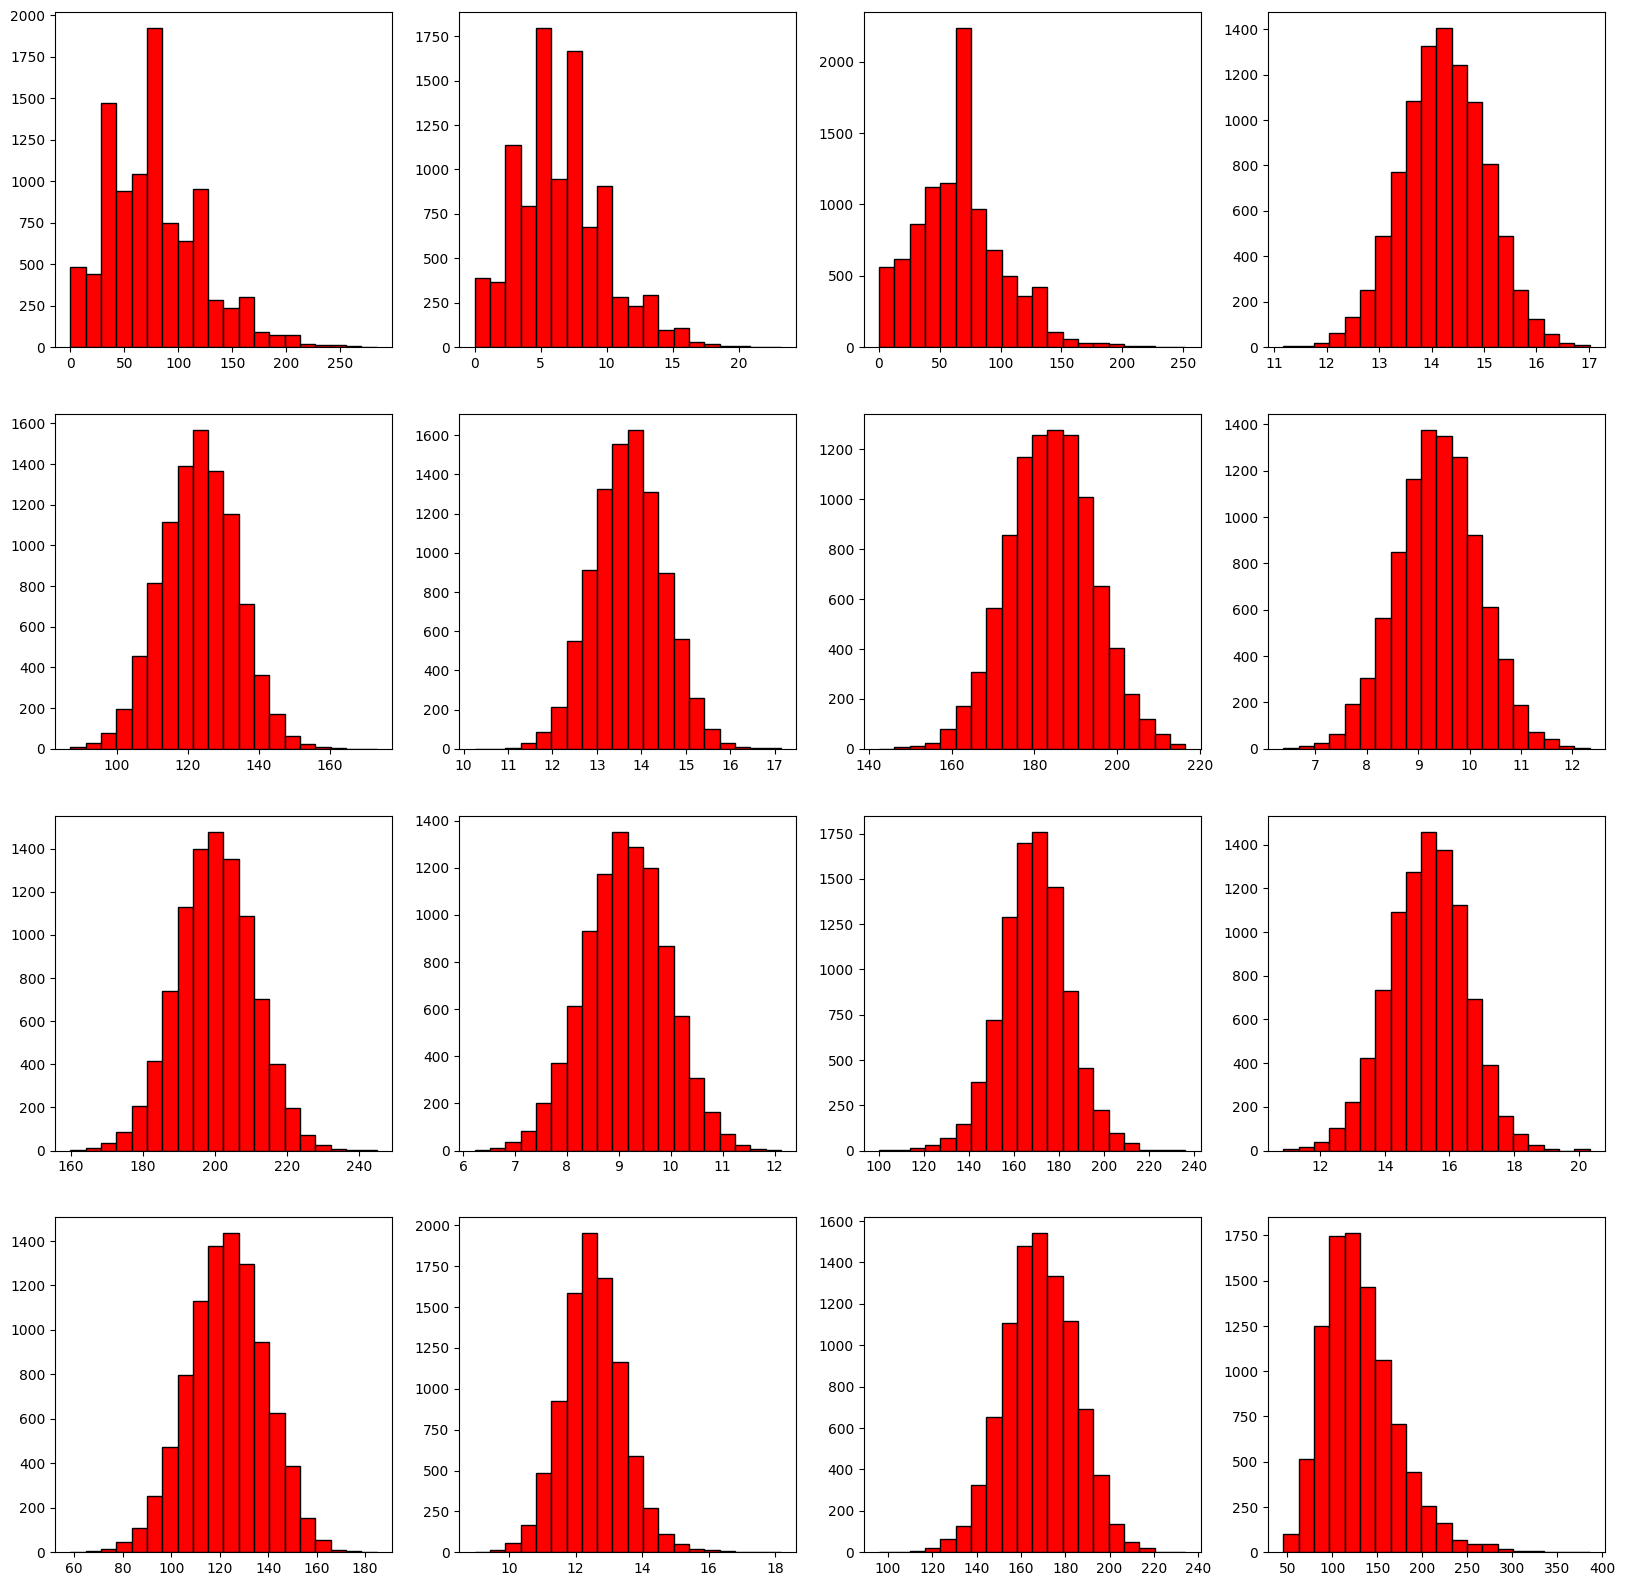

In [19]:
fig,ax=plt.subplots(nrows=4,ncols=4,figsize=(20,20))
ax[0,0].hist(x=df.m0,bins=20,edgecolor='k',color='r')
ax[0,1].hist(x=df.m1,bins=20,edgecolor='k',color='r')
ax[0,2].hist(x=df.m2,bins=20,edgecolor='k',color='r')
ax[0,3].hist(x=df.m3,bins=20,edgecolor='k',color='r')
ax[1,0].hist(x=df.m4,bins=20,edgecolor='k',color='r')
ax[1,1].hist(x=df.m5,bins=20,edgecolor='k',color='r')
ax[1,2].hist(x=df.m6,bins=20,edgecolor='k',color='r')
ax[1,3].hist(x=df.m7,bins=20,edgecolor='k',color='r')
ax[2,0].hist(x=df.m8,bins=20,edgecolor='k',color='r')
ax[2,1].hist(x=df.m9,bins=20,edgecolor='k',color='r')
ax[2,2].hist(x=df.m10,bins=20,edgecolor='k',color='r')
ax[2,3].hist(x=df.m11,bins=20,edgecolor='k',color='r')
ax[3,0].hist(x=df.m12,bins=20,edgecolor='k',color='r')
ax[3,1].hist(x=df.m13,bins=20,edgecolor='k',color='r')
ax[3,2].hist(x=df.m14,bins=20,edgecolor='k',color='r')
ax[3,3].hist(x=df.ld,bins=20,edgecolor='k',color='r')
plt.show()

- m0 and m1 are slightly left skewed

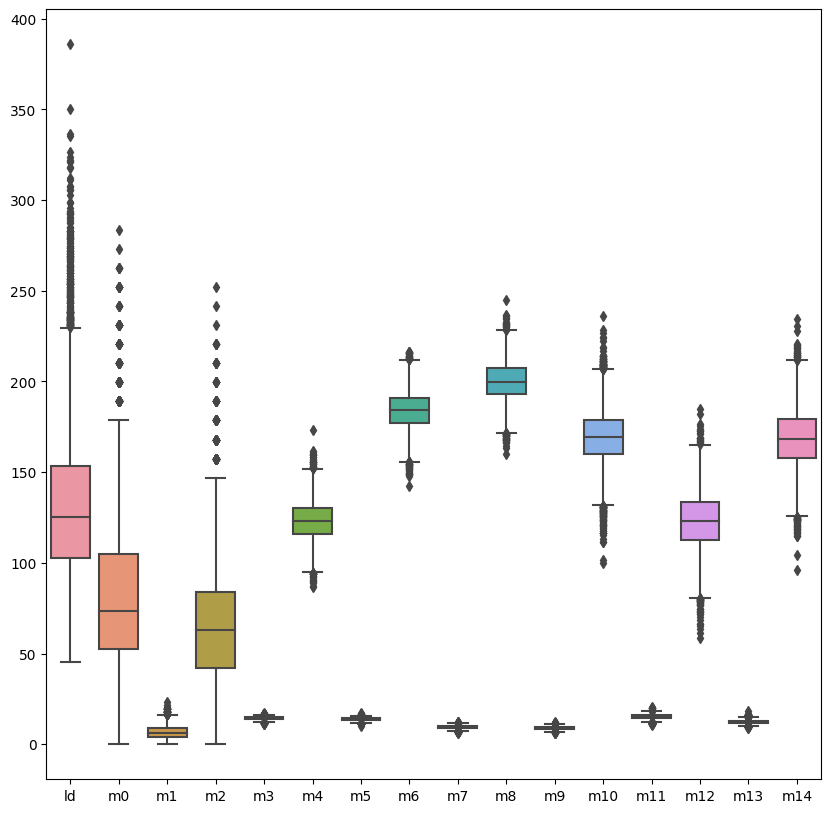

In [20]:
plt.figure(figsize=(10,10))
sns.boxplot(df.iloc[:,1:-1])
plt.show()

- almost all the features have outliers

In [21]:
df.pc.unique() ## pc is a categorical feature

array(['E', 'w', 'z', 'y', 'x'], dtype=object)

In [22]:
df.ma.unique()  ## ma is also a categorical feature

array(['m76', 'm78', 'm75', 'm55'], dtype=object)

In [23]:
df.describe()

,ld,m0,m1,m2,m3,m4,m5,m6,m7,m8,m9,m10,m11,m12,m13,m14
count,9659.000000,9746.000000,9746.000000,9746.000000,9622.000000,9520.000000,9475.000000,9476.000000,9407.000000,9350.000000,9285.000000,9258.000000,9227.000000,9135.000000,9094.000000,9043.000000
mean,131.256599,78.350298,6.571640,65.921814,14.238131,123.158861,13.708907,183.990347,9.385423,199.959666,9.141019,169.196172,15.322337,122.967749,12.525061,168.568794
std,40.540172,43.125217,3.380933,35.120614,0.797648,10.442811,0.789883,10.342416,0.802480,10.517990,0.795769,14.674091,1.196685,15.797949,0.917754,15.801496
min,45.440000,0.000000,0.000000,0.000000,11.174400,86.887500,10.250400,142.443000,6.374400,159.778500,6.224000,100.170000,10.852000,58.401000,8.966400,95.970000
25%,102.430000,52.500000,4.000000,42.000000,13.701800,115.983000,13.165200,176.904000,8.849600,192.885000,8.598400,159.747000,14.522800,112.439250,11.928000,157.920000
50%,125.480000,73.500000,6.400000,63.000000,14.231200,123.228000,13.709600,184.023000,9.390400,199.962000,9.143200,169.207500,15.356000,123.091500,12.502800,168.399000
75%,153.405000,105.000000,8.800000,84.000000,14.782400,130.389000,14.241600,191.005500,9.922400,207.141375,9.680000,178.507875,16.140000,133.675500,13.092600,179.497500
max,385.860000,283.500000,23.200000,252.000000,17.013600,173.082000,17.140000,216.499500,12.335200,244.944000,12.123200,236.029500,20.343200,184.737000,18.170400,234.181500


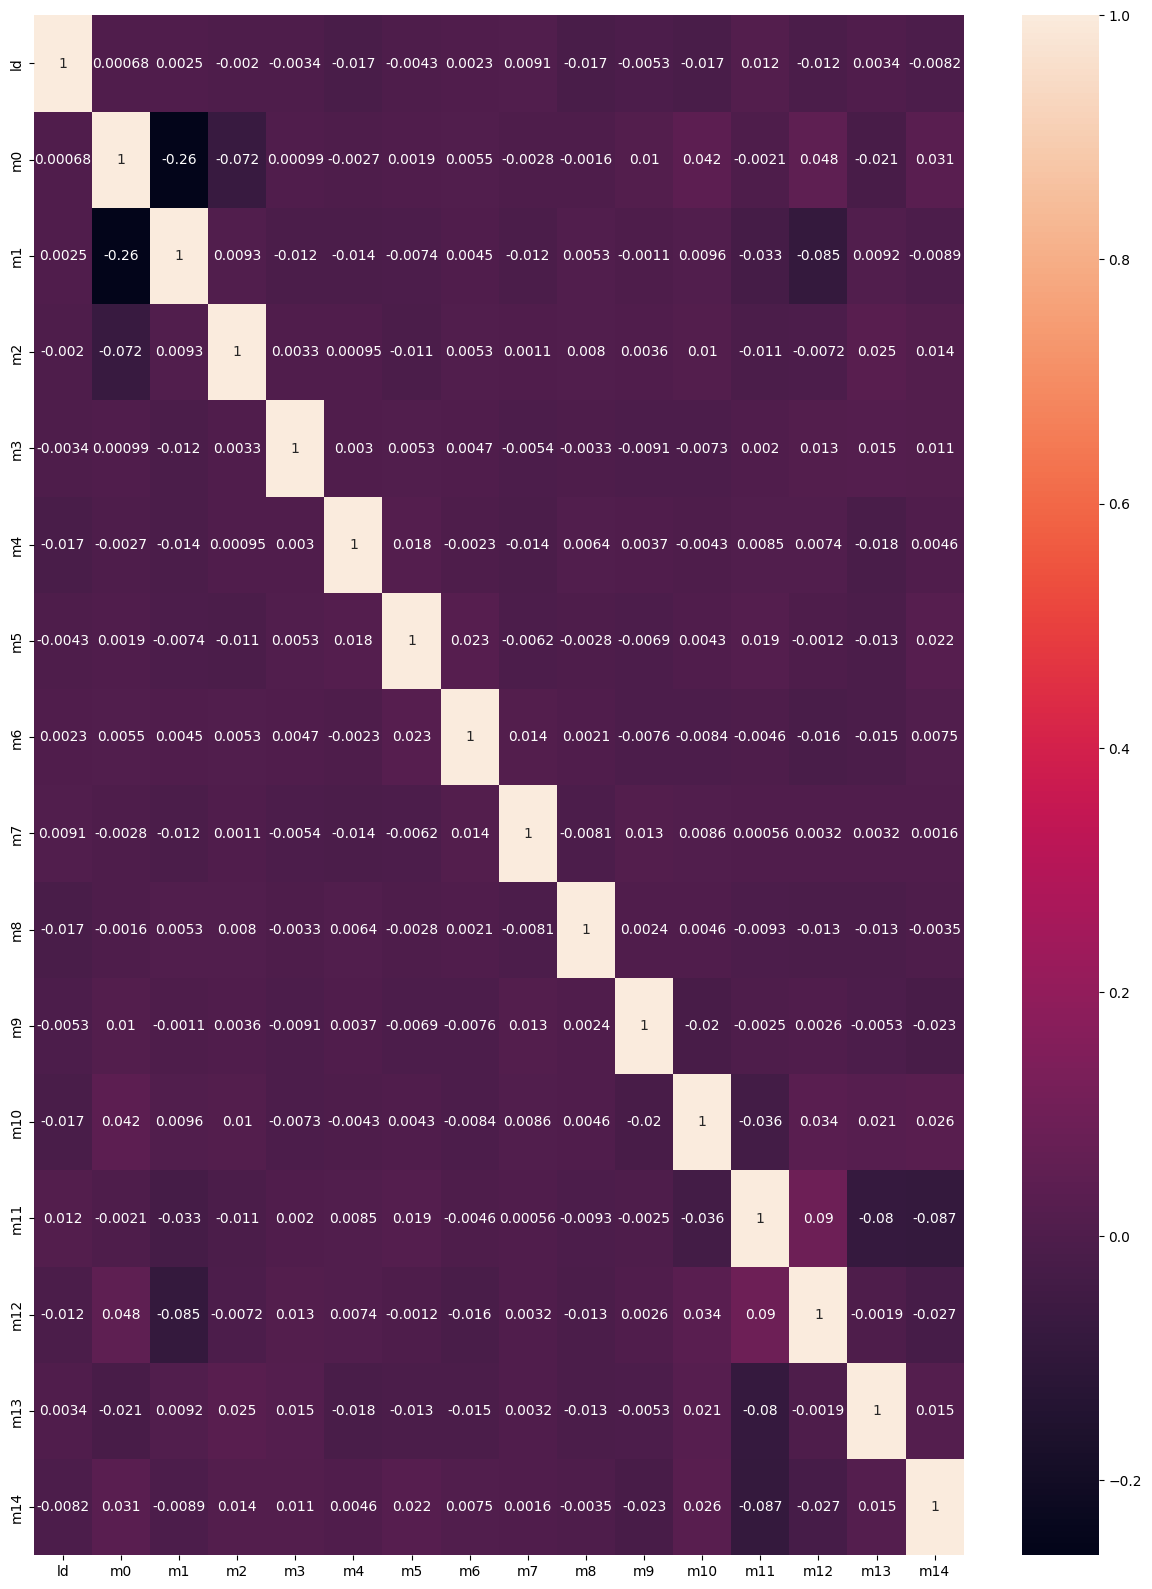

In [24]:
plt.figure(figsize=(15,20))
sns.heatmap(df.corr(),annot=True)
plt.show()

- all the features are independent

## making data pipelines

In [25]:
categorical_features=[f for f in df.columns if df[f].dtype=='O']
categorical_features

['pc', 'ma']

In [26]:
numerical_features=[f for f in df.columns if df[f].dtype!="O"]
numerical_features

['ld',
 'm0',
 'm1',
 'm2',
 'm3',
 'm4',
 'm5',
 'm6',
 'm7',
 'm8',
 'm9',
 'm10',
 'm11',
 'm12',
 'm13',
 'm14']

In [27]:
numerical_pipe=Pipeline(
    steps=[
        ("imputer",SimpleImputer(strategy='median')),
        ("scaler",StandardScaler()),
    ]
)

In [28]:
categorical_pipe=Pipeline(
    steps=[
        ("imputer1",SimpleImputer(strategy='most_frequent')),
        ("encoder",OneHotEncoder())
    ]
)

In [29]:
processor=ColumnTransformer(
    [
        ('numpipe',numerical_pipe,numerical_features),
        ("catpipe",categorical_pipe,categorical_features)
    ]
)

In [30]:
x=processor.fit_transform(df)

In [31]:
x[0]

array([ 0.95254205, -1.81690258, -0.28740278,  0.21578708,  0.3900955 ,
        0.55898884, -0.08542295, -0.9338707 , -0.51448183, -0.93648734,
        2.78683607, -0.86927811,  0.02737182, -0.02880279, -0.91368128,
        0.54292835,  1.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  1.        ,  0.        ])

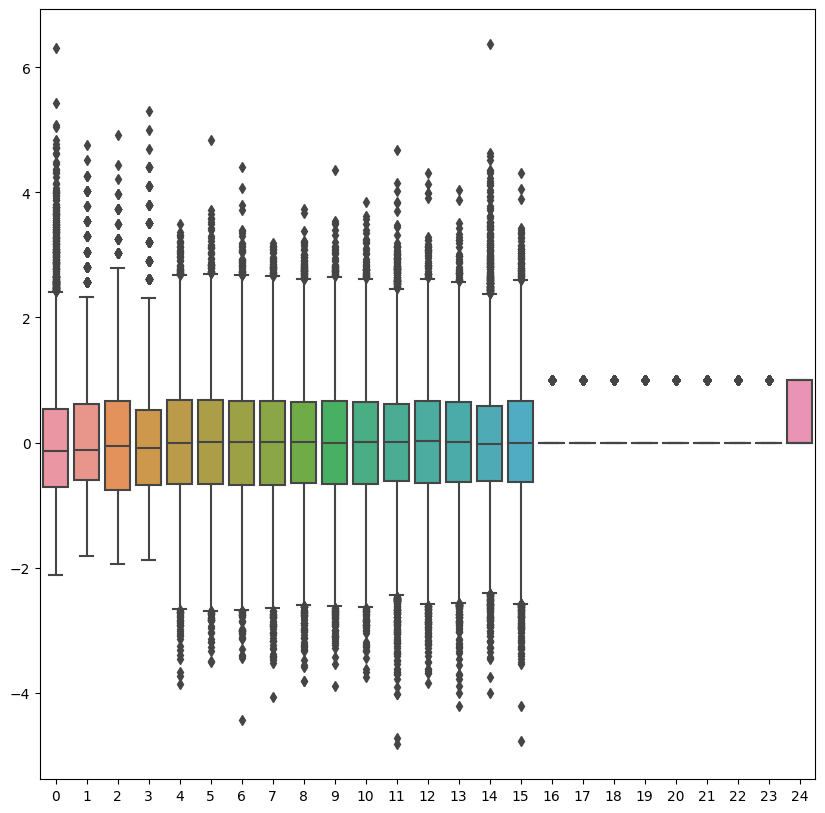

In [32]:
plt.figure(figsize=(10,10))
sns.boxplot(x)
plt.show()

In [33]:
x_train,x_test,y_train,y_test=train_test_split(x,target,test_size=0.20,random_state=45)

## Model Training and Selection

In [34]:
model3=DecisionTreeClassifier()

In [35]:
model3.fit(x_train,y_train)

DecisionTreeClassifier()

In [36]:
print(classification_report(y_test,model3.predict(x_test)))

              precision    recall  f1-score   support

           0       0.51      0.50      0.51       989
           1       0.50      0.51      0.50       961

    accuracy                           0.51      1950
   macro avg       0.51      0.51      0.51      1950
weighted avg       0.51      0.51      0.51      1950



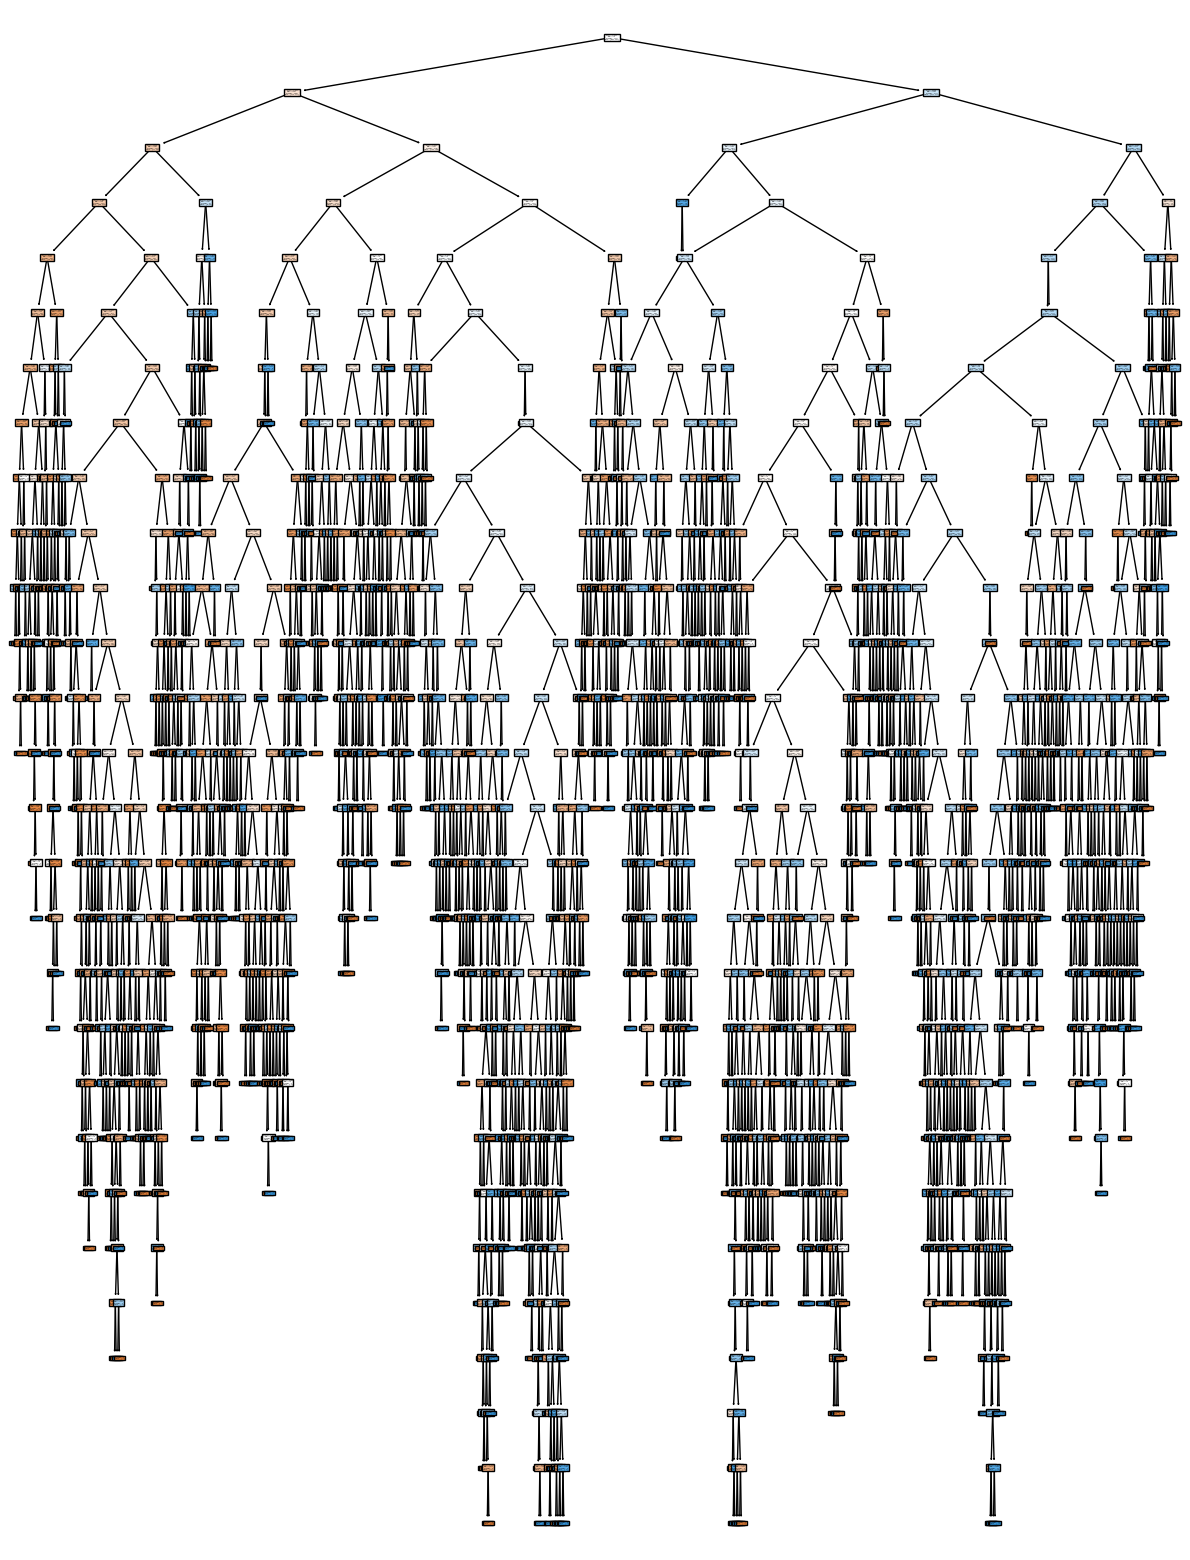

In [37]:
plt.figure(figsize=(15,20))
tree.plot_tree(model3,filled=True)
plt.show()

In [38]:
params={"criterion":['gini','entropy','log_loss'],"splitter":['best','random'],'max_depth':[2,4,6,8,10]}

In [39]:
grid=GridSearchCV(estimator=DecisionTreeClassifier(),param_grid=params,cv=5)

In [40]:
grid.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy', 'log_loss'],
                         'max_depth': [2, 4, 6, 8, 10],
                         'splitter': ['best', 'random']})

In [41]:
grid.best_params_

{'criterion': 'gini', 'max_depth': 2, 'splitter': 'best'}

In [42]:
model4=grid.best_estimator_

In [43]:
model4.fit(x_train,y_train)

DecisionTreeClassifier(max_depth=2)

In [44]:
print(classification_report(y_test,model4.predict(x_test)))

              precision    recall  f1-score   support

           0       0.57      0.60      0.59       989
           1       0.57      0.54      0.55       961

    accuracy                           0.57      1950
   macro avg       0.57      0.57      0.57      1950
weighted avg       0.57      0.57      0.57      1950



## Prediction

In [45]:
test_data.head()

,index,pc,ld,m0,m1,m2,m3,m4,m5,m6,m7,m8,m9,m10,m11,m12,m13,m14,ma
0,0,E,156.46,73.5,8.8,105.0,13.2768,113.5365,13.9552,168.5460,8.5896,187.6560,8.3472,178.5945,14.3192,138.0435,12.7008,166.1100,m76
1,1,y,58.87,84.0,12.8,42.0,14.4440,126.6930,13.6688,190.6275,10.1712,202.5870,8.5416,166.9815,15.5944,142.5690,11.6832,177.7230,m78
2,2,w,139.68,126.0,3.2,73.5,14.2432,107.4885,13.8544,168.3255,10.2504,214.2735,11.3392,155.1795,16.0256,132.1005,13.0104,185.6085,m78
3,3,z,194.06,52.5,6.4,105.0,14.5480,138.6105,13.5080,196.6545,10.6304,213.4650,9.9224,191.1000,14.8256,128.0475,12.1984,180.2745,m75
4,4,x,173.14,42.0,8.0,136.5,14.9496,103.8765,13.8936,168.3570,9.6184,191.2050,9.9400,185.0310,13.8664,124.7610,NaN,157.6470,m55


In [46]:
test_data.drop(['index'],axis=1,inplace=True)

In [47]:
test_data=processor.transform(test_data)

In [48]:
y_pred=model4.predict(x_test)

In [49]:
submission=pd.DataFrame(y_pred,columns=['pred'])

In [50]:
submission['pred'].unique()

array([0, 1], dtype=int64)

In [51]:
submission.to_csv("./submission2.csv",index=False)